In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
from IPython.display import HTML, Image

df = pd.read_csv('C:/Users/devil/OneDrive/Documents/top tech/Task-4/Task-4/Data Visualization/Plotly Visualization/Pokemon.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [7]:
df = df.fillna(value={'Type 2':'Blank'})

df.head()

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire   Blank    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False

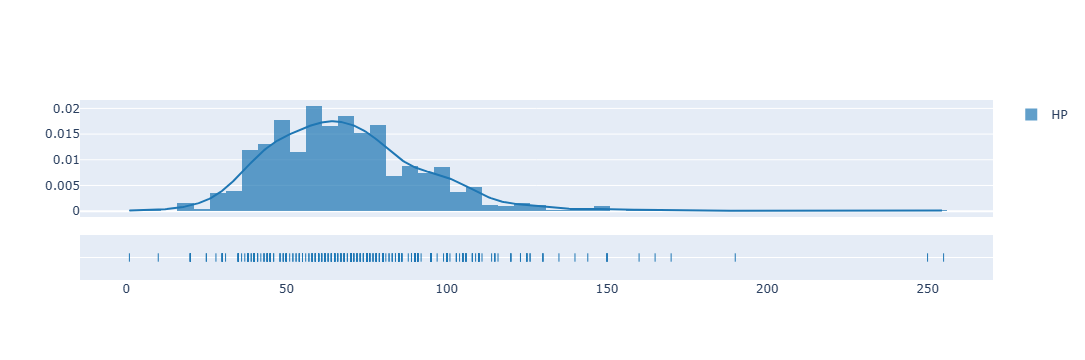

In [8]:
fig = ff.create_distplot([df.HP],['HP'],bin_size=5)
iplot(fig, filename='Basic Distplot')

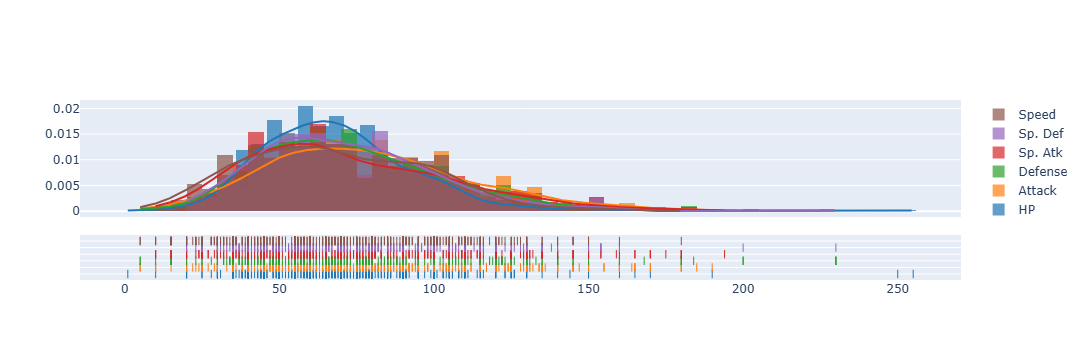

In [9]:
hist_data = [df['HP'],df['Attack'],df['Defense'],df['Sp. Atk'],df['Sp. Def'],df['Speed']]
group_labels = list(df.iloc[:,5:11].columns)

fig = ff.create_distplot(hist_data, group_labels, bin_size=5)
iplot(fig, filename='Distplot of all pokemon stats')

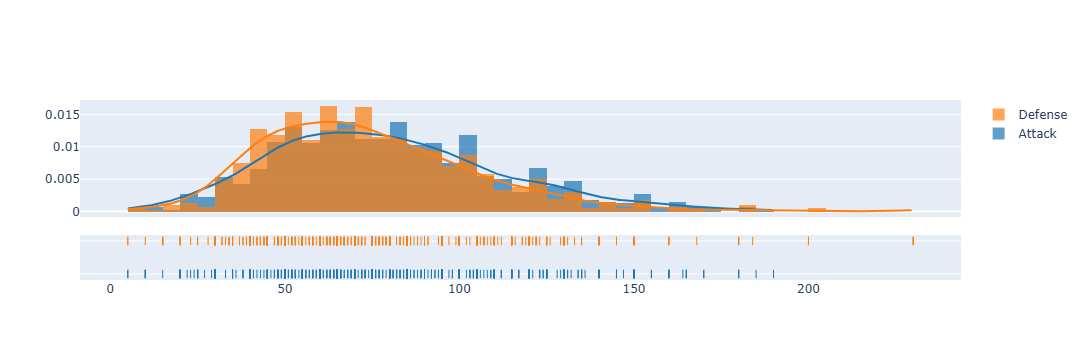

In [10]:
hist_data = [df['Attack'],df['Defense']]
group_labels = ['Attack','Defense']

fig = ff.create_distplot(hist_data, group_labels, bin_size=5)
iplot(fig, filename='Distplot of attack and defense')

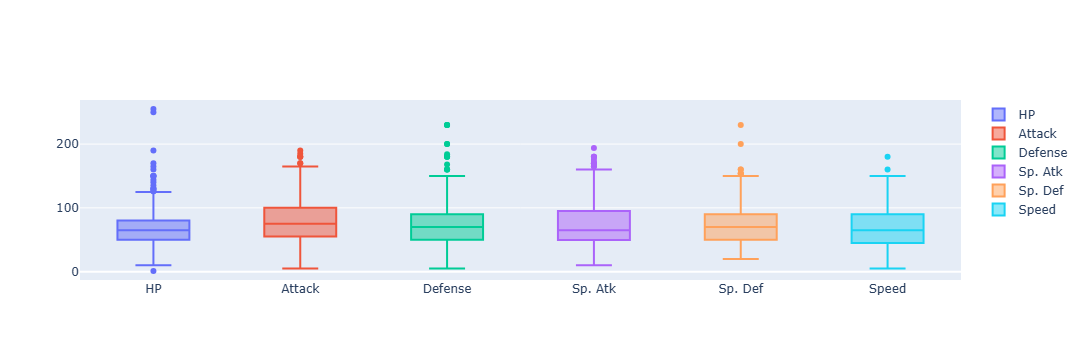

In [11]:
trace0 = go.Box(y=df["HP"],name="HP")
trace1 = go.Box(y=df["Attack"],name="Attack")
trace2 = go.Box(y=df["Defense"],name="Defense")
trace3 = go.Box(y=df["Sp. Atk"],name="Sp. Atk")
trace4 = go.Box(y=df["Sp. Def"],name="Sp. Def")
trace5 = go.Box(y=df["Speed"],name="Speed")
data = [trace0, trace1, trace2,trace3, trace4, trace5]
iplot(data)

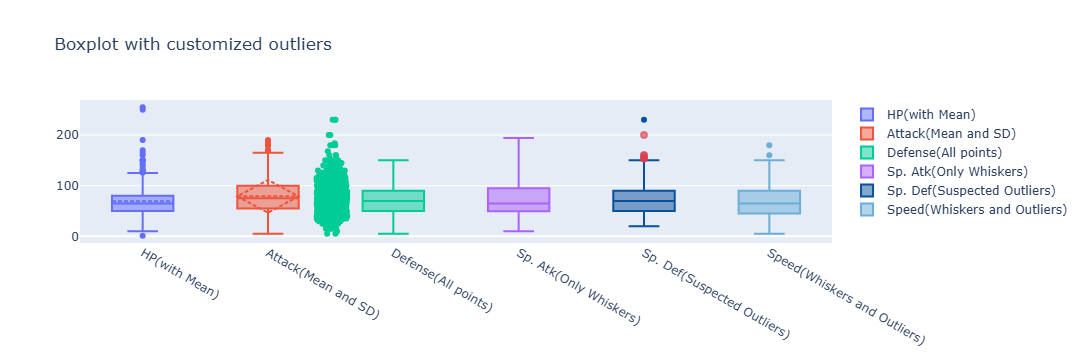

In [12]:
trace0 = go.Box(
    y=df["HP"],
    boxmean = True,
    name="HP(with Mean)"
)
trace1 = go.Box(
    y=df["Attack"],
    boxmean = 'sd',
    name="Attack(Mean and SD)"
)
trace2 = go.Box(
    y=df["Defense"],
    jitter = 0.5,
    pointpos = -2,
    boxpoints = 'all',
    name = "Defense(All points)"
)
trace3 = go.Box(
    y=df["Sp. Atk"],
    boxpoints = False,
    name = "Sp. Atk(Only Whiskers)"
)
trace4 = go.Box(
    y=df["Sp. Def"],
    boxpoints = 'suspectedoutliers',
    marker = dict(
        outliercolor = 'rgba(219, 64, 82, 0.6)',
        line = dict(
            outliercolor = 'rgba(219, 64, 82, 0.6)',
            outlierwidth = 2)),
    line = dict(
        color = 'rgb(8,81,156)'),
    name = "Sp. Def(Suspected Outliers)"
)
trace5 = go.Box(
    y=df["Speed"],
    boxpoints = 'outliers',
    line = dict(
        color = 'rgb(107,174,214)'),
    name = "Speed(Whiskers and Outliers)"
)

layout = go.Layout(
    title = "Boxplot with customized outliers"
)
data = [trace0, trace1, trace2, trace3, trace4, trace5]
fig = go.Figure(data=data,layout=layout)
iplot(fig, filename = "Customized Boxplot")

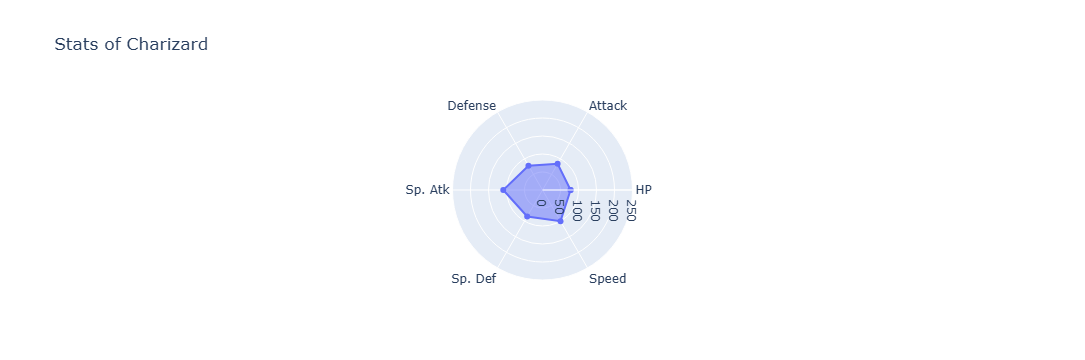

In [13]:
x = df[df["Name"] == "Charizard"]
data = [go.Scatterpolar(
  r = [x['HP'].values[0],x['Attack'].values[0],x['Defense'].values[0],x['Sp. Atk'].values[0],x['Sp. Def'].values[0],x['Speed'].values[0],x["HP"].values[0]],
  theta = ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','HP'],
  fill = 'toself'
)]

layout = go.Layout(
  polar = dict(
    radialaxis = dict(
      visible = True,
      range = [0, 250]
    )
  ),
  showlegend = False,
  title = "Stats of {}".format(x.Name.values[0])
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename = "Single Pokemon stats")

In [15]:
def compare2pokemon(x,y):
    x = df[df["Name"] == x]
    y = df[df["Name"] == y]

    trace0 = go.Scatterpolar(
      r = [x['HP'].values[0],x['Attack'].values[0],x['Defense'].values[0],x['Sp. Atk'].values[0],x['Sp. Def'].values[0],x['Speed'].values[0],x["HP"].values[0]],
      theta = ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','HP'],
      fill = 'toself',
      name = x.Name.values[0]
    )

    trace1 = go.Scatterpolar(
      r = [y['HP'].values[0],y['Attack'].values[0],y['Defense'].values[0],y['Sp. Atk'].values[0],y['Sp. Def'].values[0],y['Speed'].values[0],y["HP"].values[0]],
      theta = ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','HP'],
      fill = 'toself',
      name = y.Name.values[0]
    )

    data = [trace0, trace1]

    layout = go.Layout(
      polar = dict(
        radialaxis = dict(
          visible = True,
          range = [0, 200]
        )
      ),
      showlegend = True,
      title = "{} vs {}".format(x.Name.values[0],y.Name.values[0])
    )
    fig = go.Figure(data=data, layout=layout)
    iplot(fig, filename = "Two Pokemon stats")

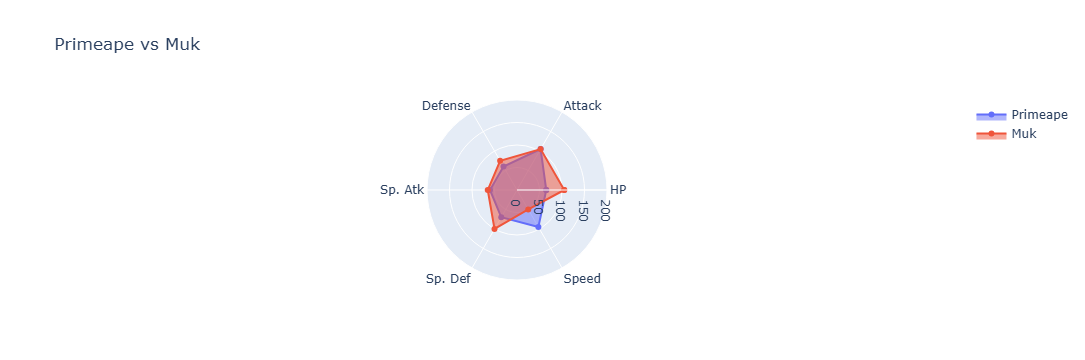

In [17]:
compare2pokemon("Primeape","Muk")

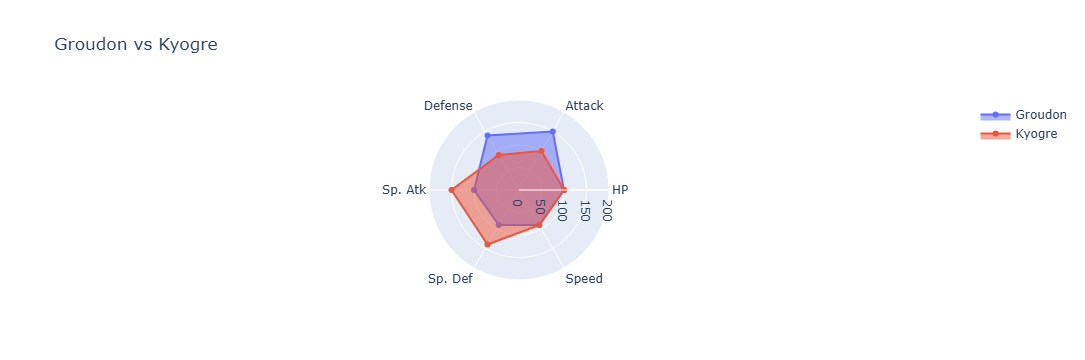

In [18]:
compare2pokemon("Groudon","Kyogre")

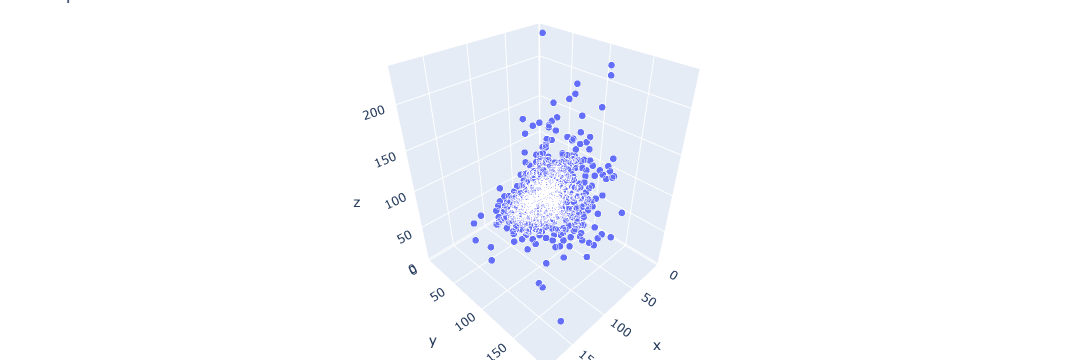

In [20]:
t = go.Scatter3d(
    x=df["Speed"],
    y=df["Attack"],
    z=df["Defense"],
    mode='markers',
    marker=dict(
        size=4,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=1
    )
)
data = [t]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    xaxis=dict(title="Speed"),
    yaxis=dict(title="Attack"),
    title = "Speed vs Attack vs Defense"
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='3d-scatter')

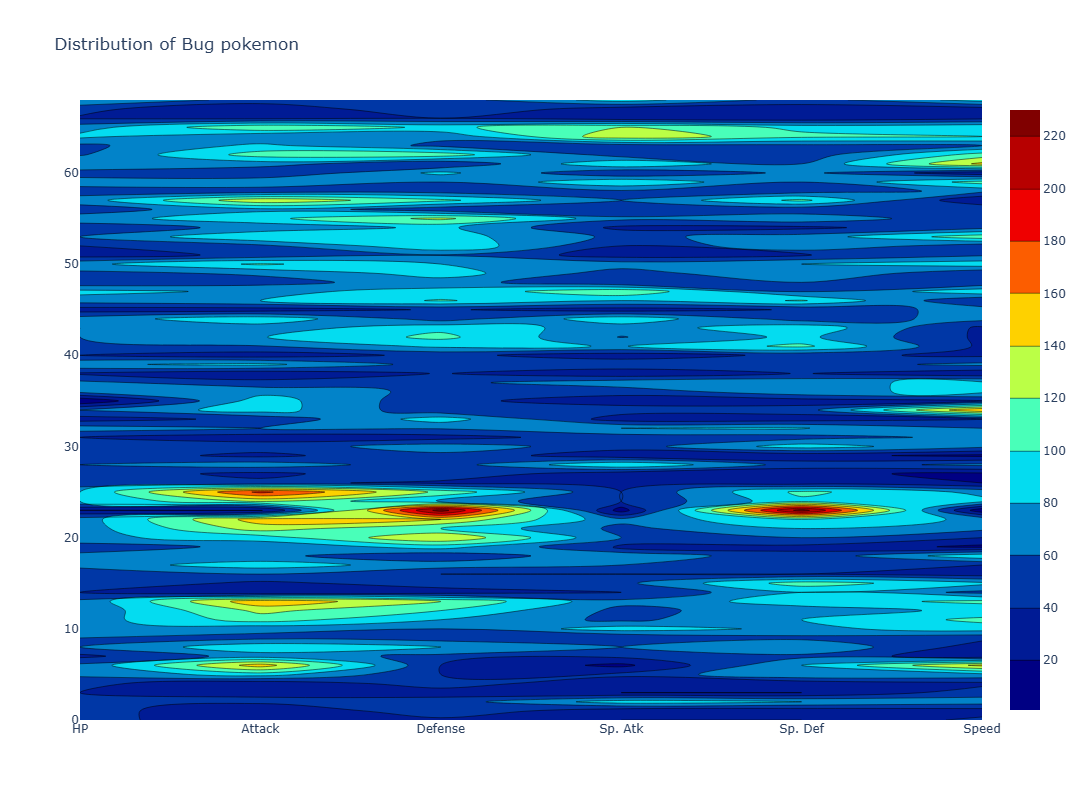

In [23]:
data = [
    go.Contour(
        x=['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed'],
        z=df[df["Type 1"]=="Bug"].iloc[:,5:11].values,
        colorscale='Jet',
    )
]

layout = go.Layout(
    title = "Distribution of Bug pokemon",
    width = 600,
    height = 800
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='bug-contour')

C:\Users\devil\anaconda3\Lib\site-packages\plotly\tools.py:455: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead

C:\Users\devil\anaconda3\Lib\site-packages\plotly\graph_objs\_deprecations.py:405: DeprecationWarning:

plotly.graph_objs.Margin is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Margin




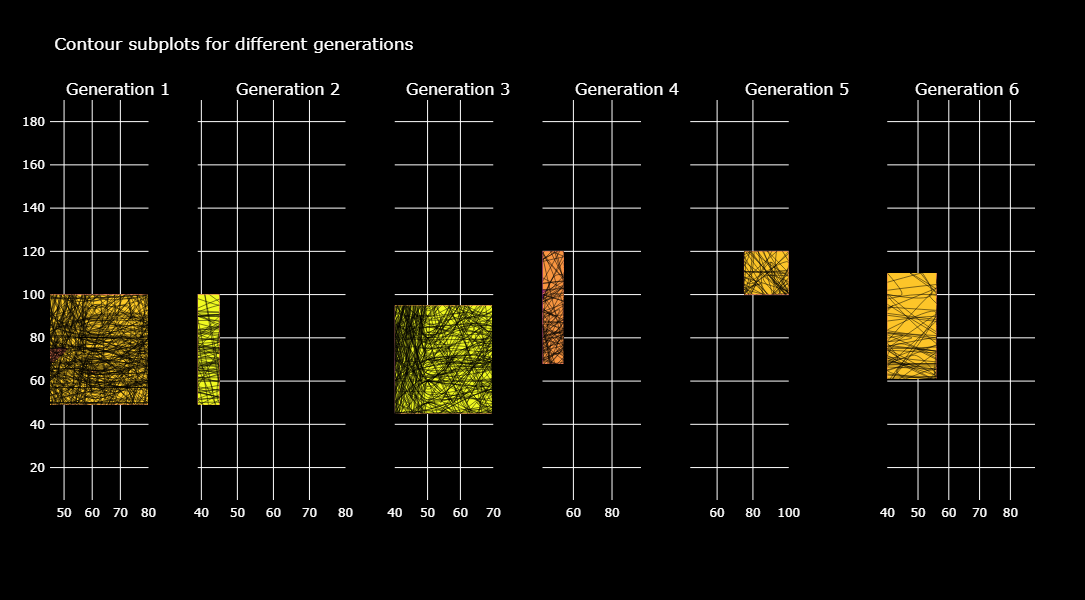

In [24]:
gen1 = go.Contour(
    x = df[df["Generation"] == 1].iloc[:,5].values,
    y = df[df["Generation"] == 1].iloc[:,6].values,
    z = df[df["Generation"] == 1].iloc[:,7:11].values,
    name = "Generation 1",
    showscale=False,
)
gen2 = go.Contour(
    x = df[df["Generation"] == 2].iloc[:,5].values,
    y = df[df["Generation"] == 2].iloc[:,6].values,
    z = df[df["Generation"] == 2].iloc[:,7:11].values,
    name = "Generation 2",
    showscale=False,
)
gen3 = go.Contour(
    x = df[df["Generation"] == 3].iloc[:,5].values,
    y = df[df["Generation"] == 3].iloc[:,6].values,
    z = df[df["Generation"] == 3].iloc[:,7:11].values,
    name = "Generation 3",
    showscale=False
)
gen4 = go.Contour(
    x = df[df["Generation"] == 4].iloc[:,5].values,
    y = df[df["Generation"] == 4].iloc[:,6].values,
    z = df[df["Generation"] == 4].iloc[:,7:11].values,
    name = "Generation 4",
    showscale=False
)
gen5 = go.Contour(
    x = df[df["Generation"] == 5].iloc[:,5].values,
    y = df[df["Generation"] == 5].iloc[:,6].values,
    z = df[df["Generation"] == 5].iloc[:,7:11].values,
    name = "Generation 5",                     
    showscale=False
)
gen6 = go.Contour(
    x = df[df["Generation"] == 6].iloc[:,5].values,
    y = df[df["Generation"] == 6].iloc[:,6].values,
    z = df[df["Generation"] == 6].iloc[:,7:11].values,
    name = "Generation 6",                     
    showscale=False
)


fig = tools.make_subplots(rows=1, cols=6, subplot_titles=('Generation 1', 'Generation 2', 'Generation 3', 'Generation 4', 'Generation 5', 'Generation 6'), shared_yaxes=True)

fig.append_trace(gen1, 1, 1)
fig.append_trace(gen2, 1, 2)
fig.append_trace(gen3, 1, 3)
fig.append_trace(gen4, 1, 4)
fig.append_trace(gen5, 1, 5)
fig.append_trace(gen6, 1, 6)

fig['layout'].update(height=600, 
                     width=800, 
                     title='Contour subplots for different generations',
                     paper_bgcolor='rgba(0,0,0,1)',
                     plot_bgcolor='rgba(0,0,0,1)',
                     font=dict(size=12, 
                     color='#ffffff'),
                     showlegend=True,
                     margin=go.Margin(
                     l=50,
                     r=50,
                     b=100,
                     t=100,
                     pad=4,
                 ),
                 xaxis=dict(
                        domain=[0, 0.1]
                 ),
                xaxis2=dict(
                        domain=[0.15, 0.30]
                ),
                xaxis3=dict(
                        domain=[0.35, 0.45]
                ),  
                xaxis4=dict(
                        domain=[0.5, 0.6]
                ),            
                xaxis5=dict(
                        domain=[0.65, 0.75]
                ),  
                xaxis6=dict(
                        domain=[0.85, 1]
                )
 )
iplot(fig, filename='contour-subplots')

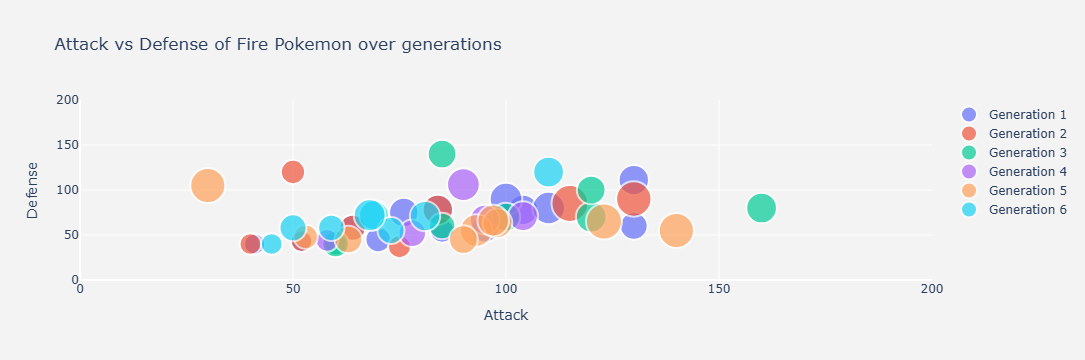

In [25]:
sizeref = 2.*max(df['HP'])/(3000)

trace0 = go.Scatter(
    x=df["Attack"][df["Type 1"] == "Fire"][df["Generation"] == 1],
    y=df["Defense"][df["Type 1"] == "Fire"][df["Generation"] == 1],
    mode='markers',
    name='Generation 1',
    text=df["Name"][df["Type 1"] == "Fire"][df["Generation"] == 1],
    marker=dict(
        symbol='circle',
        sizemode='area',
        size=df["HP"][df["Type 1"] == "Fire"][df["Generation"] == 1],
        sizeref=sizeref,
        line=dict(
            width=2
        ),
    )
)
trace1 = go.Scatter(
    x=df["Attack"][df["Type 1"] == "Fire"][df["Generation"] == 2],
    y=df["Defense"][df["Type 1"] == "Fire"][df["Generation"] == 2],
    mode='markers',
    name='Generation 2',
    text=df["Name"][df["Type 1"] == "Fire"][df["Generation"] == 2],
    marker=dict(
        sizemode='area',
        size=df["HP"][df["Type 1"] == "Fire"][df["Generation"] == 2],
        sizeref=sizeref,
        line=dict(
            width=2
        ),
    )
)
trace2 = go.Scatter(
    x=df["Attack"][df["Type 1"] == "Fire"][df["Generation"] == 3],
    y=df["Defense"][df["Type 1"] == "Fire"][df["Generation"] == 3],
    mode='markers',
    name='Generation 3',
    text=df["Name"][df["Type 1"] == "Fire"][df["Generation"] == 3],
    marker=dict(
        sizemode='area',
        size=df["HP"][df["Type 1"] == "Fire"][df["Generation"] == 3],
        sizeref=sizeref,
        line=dict(
            width=2
        ),
    )
)
trace3 = go.Scatter(
    x=df["Attack"][df["Type 1"] == "Fire"][df["Generation"] == 4],
    y=df["Defense"][df["Type 1"] == "Fire"][df["Generation"] == 4],
    mode='markers',
    name='Generation 4',
    text=df["Name"][df["Type 1"] == "Fire"][df["Generation"] == 4],
    marker=dict(
        sizemode='area',
        size=df["HP"][df["Type 1"] == "Fire"][df["Generation"] == 4],
        sizeref=sizeref,
        line=dict(
            width=2
        ),
    )
)
trace4 = go.Scatter(
    x=df["Attack"][df["Type 1"] == "Fire"][df["Generation"] == 5],
    y=df["Defense"][df["Type 1"] == "Fire"][df["Generation"] == 5],
    mode='markers',
    name='Generation 5',
    text=df["Name"][df["Type 1"] == "Fire"][df["Generation"] == 5],
    marker=dict(
        sizemode='area',
        size=df["HP"][df["Type 1"] == "Fire"][df["Generation"] == 5],
        sizeref=sizeref,
        line=dict(
            width=2
        ),
    )
)
trace5 = go.Scatter(
    x=df["Attack"][df["Type 1"] == "Fire"][df["Generation"] == 6],
    y=df["Defense"][df["Type 1"] == "Fire"][df["Generation"] == 6],
    mode='markers',
    name='Generation 6',
    text=df["Name"][df["Type 1"] == "Fire"][df["Generation"] == 6],
    marker=dict(
        sizemode='area',
        size=df["HP"][df["Type 1"] == "Fire"][df["Generation"] == 6],
        sizeref=sizeref,
        line=dict(
            width=2
        ),
    )
)

data = [trace0, trace1, trace2, trace3, trace4, trace5]
layout = go.Layout(
    title='Attack vs Defense of Fire Pokemon over generations',
    xaxis=dict(
        title='Attack',
        gridcolor='rgb(255, 255, 255)',
        range=[0,200]
    ),
    yaxis=dict(
        title='Defense',
        gridcolor='rgb(255, 255, 255)',
        range=[0,200]
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='bubble.png')

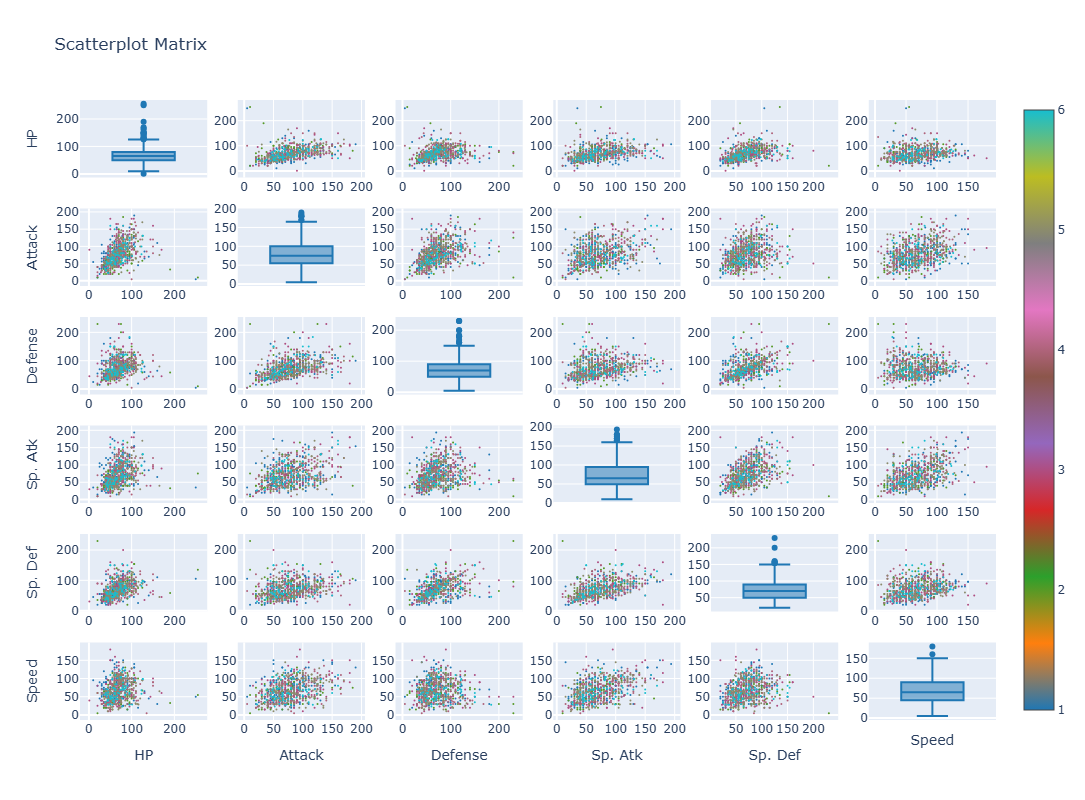

In [32]:
fig = ff.create_scatterplotmatrix(df.iloc[:,5:12], index='Generation', diag='box', size=2, height=800, width=800)
iplot(fig, filename ='Scatterplotmatrix.png',image='png')

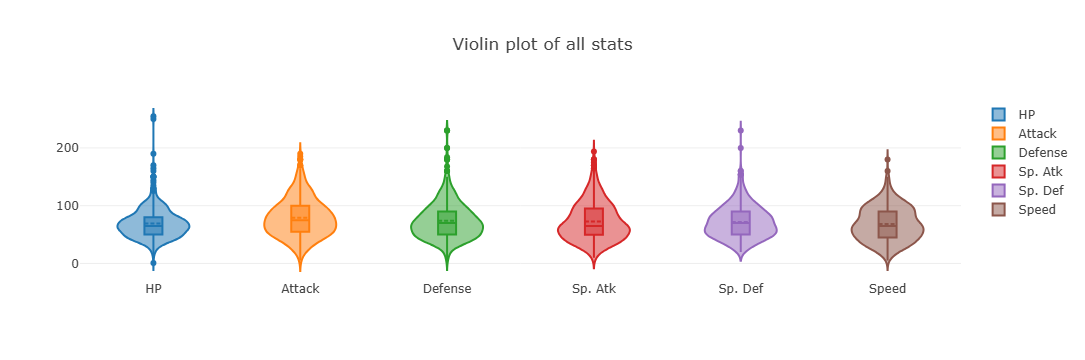

In [33]:
data = []
for i in range(5,11):
    trace = {
            "type": 'violin',
            "x": max(df.iloc[:,i]),
            "y": df.iloc[:,i],
            "name": list(df.columns)[i],
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            }
        }
    data.append(trace)
        
fig = {
    "data": data,
    "layout" : {
        "title": "Violin plot of all stats",
        "yaxis": {
            "zeroline": False,
        }
    }
}

iplot(fig, filename='violin', validate = False)